In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
# Data Loaded and Data Clean Up: DateTime column converted to DateTime DataType and job_skills column skills were string Converted to List

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Give (#) to the df below and and then remove (#) from the above (dataset & df) to review the Data on your device 

# df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df['job_posted_date_month'] = df['job_posted_date'].dt.month

In [3]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Senior Data Engineer', 'Senior Data Scientist', 'Senior Data Analyst']

In [4]:
df_US_top6 = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

In [5]:
df_US_top6=df_US_top6.dropna(subset=['salary_year_avg']).reset_index(drop=True)

In [6]:
title_rank = df_US_top6.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False).index

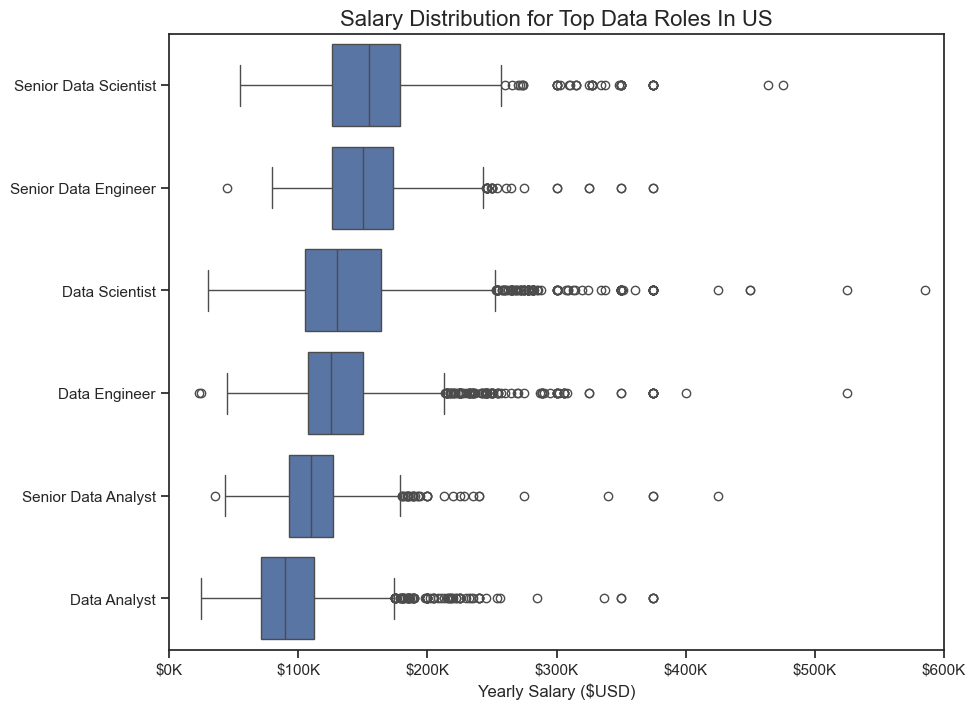

In [58]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.boxplot(df_US_top6, x='salary_year_avg', y='job_title_short', order=title_rank)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)
plt.title('Salary Distribution for Top Data Roles In US', fontsize=16)
plt.show()

## Top 10 In-demand Skills Median Pay vs. Top 10 Skills by Median pay for Data Analyst

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).reset_index(drop=True)

In [15]:
df_DA_US_exp = df_DA_US.explode('job_skills')

In [20]:
da_gr_toppay = df_DA_US_exp.groupby('job_skills').agg(
    skill_count = ('salary_year_avg', 'count'),
    median_salary = ('salary_year_avg', 'median')
).sort_values(by='median_salary', ascending=False).head(10)
da_gr_toppay

,skill_count,median_salary
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [26]:
da_gr_topcount=df_DA_US_exp.groupby('job_skills').agg(
    skill_count = ('salary_year_avg', 'count'),
    median_salary = ('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10).sort_values(by='median_salary', ascending=False)
da_gr_topcount

,skill_count,median_salary
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


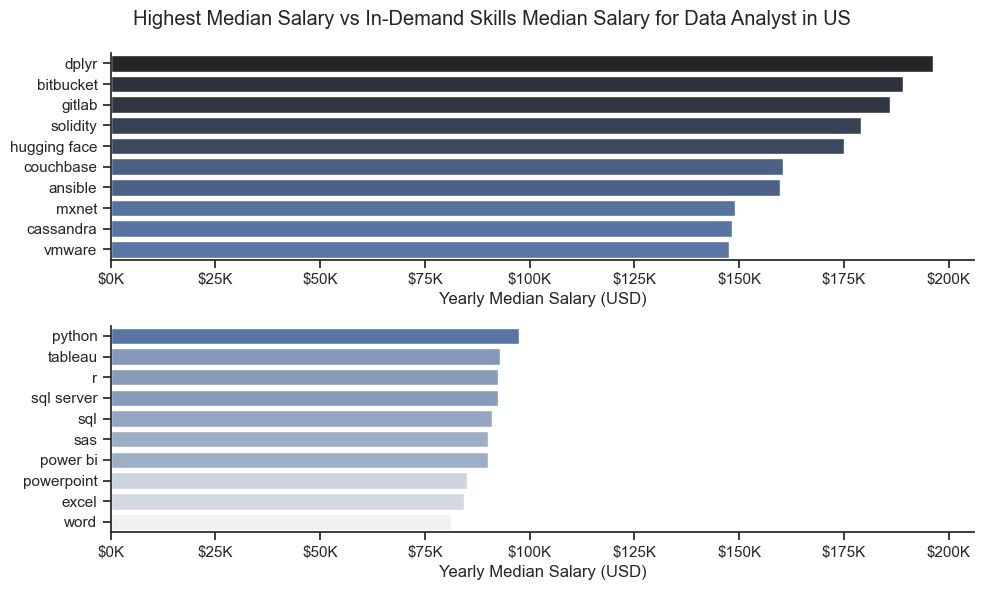

In [55]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(da_gr_toppay, x='median_salary', y='job_skills', ax=ax[0], hue='median_salary', palette='dark:b_r', legend=False)
ax[0].set_xlabel('Yearly Median Salary (USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(da_gr_topcount, x='median_salary', y='job_skills', ax=ax[1], hue='median_salary', palette='light:b', legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Yearly Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


plt.suptitle('Highest Median Salary vs In-Demand Skills Median Salary for Data Analyst in US')
plt.tight_layout()
plt.show()